In [4]:
import pandas as pd

df = pd.read_csv("../data/flipkart.csv")
df.head()

,product_id,product_name,category,brand,seller,seller_city,price,discount_percent,final_price,rating,...,weight_g,warranty_months,color,size,return_policy_days,is_returnable,payment_modes,shipping_weight_g,product_score,seller_rating
0,FKP0000001,Adidas Ultra 664,Toys,Adidas,MegaStore,Hyderabad,35547.34,15,30215.24,1.9,...,3038.23,36,Green,XL,30,True,"COD,CARD",3483.592454,6.78,3.28
1,FKP0000002,LG Series 124,Fashion,LG,ValueKart,Mumbai,30693.79,10,27624.41,3.2,...,1921.82,0,Grey,One Size,7,True,"UPI,CARD",2091.473835,50.78,3.42
2,FKP0000003,Redmi Model 35,Beauty,Redmi,SmartDeals,Ahmedabad,51214.50,40,30728.70,4.4,...,1143.49,12,Black,M,0,False,"COD,UPI,CARD",1242.770494,4.24,4.23
3,FKP0000004,Sony Edition 769,Toys,Sony,UrbanRetails,Delhi,33168.49,30,23217.94,2.8,...,3644.81,24,Black,L,0,False,"CARD,Wallet",3891.222716,1.38,3.45
4,FKP0000005,Boat Prime 291,Home & Kitchen,Boat,RetailHub,Pune,14181.34,0,14181.34,3.7,...,310.33,0,Blue,NaN,30,True,"CARD,Wallet",386.061014,79.27,4.90


In [5]:
df.shape

(80000, 25)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          80000 non-null  object 
 1   product_name        80000 non-null  object 
 2   category            80000 non-null  object 
 3   brand               80000 non-null  object 
 4   seller              80000 non-null  object 
 5   seller_city         80000 non-null  object 
 6   price               80000 non-null  float64
 7   discount_percent    80000 non-null  int64  
 8   final_price         80000 non-null  float64
 9   rating              80000 non-null  float64
 10  review_count        80000 non-null  int64  
 11  stock_available     80000 non-null  int64  
 12  units_sold          80000 non-null  int64  
 13  listing_date        80000 non-null  object 
 14  delivery_days       80000 non-null  int64  
 15  weight_g            80000 non-null  float64
 16  warr

In [7]:
# Convertir listing_date a formato fecha
df["listing_date"] = pd.to_datetime(df["listing_date"], errors="coerce")

# Verificar el cambio
df["listing_date"].dtype

dtype('<M8[ns]')

In [8]:
df.isnull().sum().sort_values(ascending=False)

size                  13484
product_name              0
category                  0
brand                     0
seller                    0
seller_city               0
price                     0
discount_percent          0
product_id                0
final_price               0
rating                    0
stock_available           0
review_count              0
listing_date              0
delivery_days             0
weight_g                  0
units_sold                0
warranty_months           0
color                     0
return_policy_days        0
is_returnable             0
payment_modes             0
shipping_weight_g         0
product_score             0
seller_rating             0
dtype: int64

In [9]:
# Precio esperado según descuento
expected_price = df["price"] * (1 - df["discount_percent"] / 100)

# Diferencia absoluta
price_diff = (df["final_price"] - expected_price).abs()

price_diff.describe()

count    8.000000e+04
mean     2.164363e-03
std      1.762822e-03
min      0.000000e+00
25%      9.094947e-13
50%      2.000000e-03
75%      4.000000e-03
max      5.000000e-03
dtype: float64

In [10]:
df["price"].describe()

count    80000.000000
mean     30137.256454
std      17274.048682
min        200.140000
25%      15180.205000
50%      30164.455000
75%      45077.087500
max      59995.800000
Name: price, dtype: float64

In [11]:
df.groupby("category")["price"].describe()

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
Appliances,9971.0,29826.052441,17316.129491,206.46,14794.0200,29647.230,44677.0400,59990.90
Beauty,10094.0,30328.205296,17305.054948,206.04,15299.4600,30596.505,45392.4725,59994.67
Electronics,10052.0,30093.881201,17196.331906,217.42,15291.9225,30071.935,44758.5625,59993.33
Fashion,10080.0,30148.962268,17325.484937,200.87,15141.5825,30029.555,45062.2400,59988.68
Home & Kitchen,9763.0,30172.229618,17272.481971,200.33,15171.2800,30469.070,45296.8300,59992.58
Mobiles,9904.0,30090.060120,17233.851929,200.14,15098.3350,30227.920,44931.4925,59990.21
Sports,9985.0,30296.456630,17130.208123,203.40,15622.2900,30208.040,45083.4600,59995.01
Toys,10151.0,30140.208554,17409.759105,200.51,14961.0900,30117.980,45386.8200,59995.80


In [12]:
df.groupby("discount_percent")["units_sold"].mean().sort_index()

discount_percent
0     2532.593938
5     2519.555787
10    2480.264977
15    2510.912694
20    2483.727127
30    2504.076184
40    2506.953253
50    2522.358337
Name: units_sold, dtype: float64

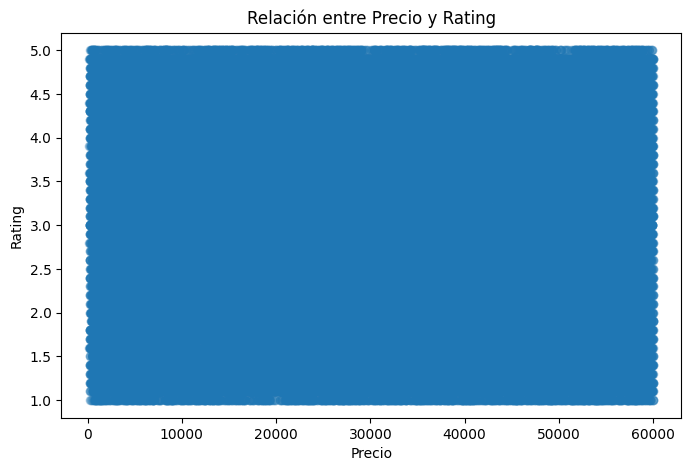

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(df["price"], df["rating"], alpha=0.3)
plt.xlabel("Precio")
plt.ylabel("Rating")
plt.title("Relación entre Precio y Rating")
plt.show()

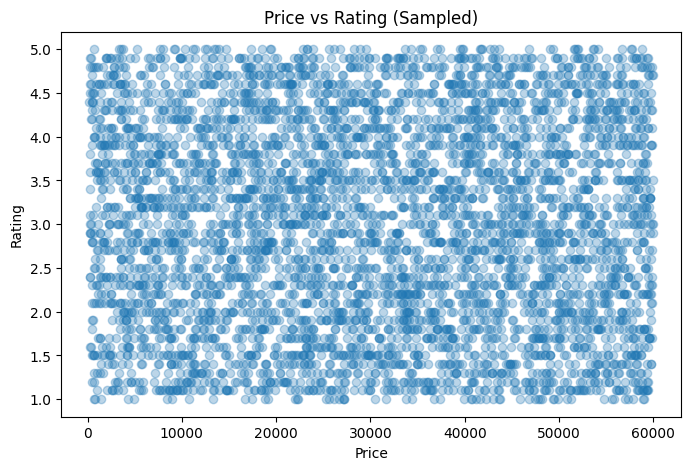

In [14]:
sample_df = df.sample(5000, random_state=42)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.scatter(sample_df["price"], sample_df["rating"], alpha=0.3)
plt.xlabel("Price")
plt.ylabel("Rating")
plt.title("Price vs Rating (Sampled)")
plt.show()